In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../data/washington_hikes_clean_noout.csv', )

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,hike_name,region,length,elevation gain,rating,number_votes,features,...,which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long,hike_id
0,0,0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",...,No pass or permit required,116.533333,http://www.wta.org/go-hiking/hikes/grand-park,http://maps.google.com/maps?hl=en&sz=11&spn=0....,212.0,The classic approach (via Sunrise) to this sea...,4.25,8.0,"46.9963,-121.6413",0
1,1,1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],...,No pass or permit required,NaN,http://www.wta.org/go-hiking/hikes/shellrock-pass,NaN,2.0,The Shellrock Pass trail has not been maintain...,2.33,NaN,NaN,1
2,2,2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",...,Northwest Forest Pass required,227.333333,http://www.wta.org/go-hiking/hikes/soda-peaks-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,24.0,Take a trip to a seldom-seen part of the South...,3.00,7.0,"45.8846,-122.0001",2
3,3,3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",...,Northwest Forest Pass required,207.433333,http://www.wta.org/go-hiking/hikes/shorthorn,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,This trail ascends the south slopes of Mount A...,3.67,5.6,"46.1989,-121.0593",3
4,4,4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",...,Northwest Forest Pass required,115.750000,http://www.wta.org/go-hiking/hikes/west-fork-t...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,The West Fork Teanaway Trail begins at Forest ...,2.75,19.2,"47.2915,-121.0064",4


In [6]:

features = []
for f in df['features']:
    flist = f.strip('[').strip(']').split(',')
    features.extend(flist)
features = list(np.unique([f.lstrip() for f in features if f != '']))
for f in features:
    df[f] = [1 if f in t else 0 for t in df['features']]


In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,hike_name,region,length,elevation gain,rating,number_votes,features,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
0,0,0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",...,0,0,1,0,0,0,0,0,0,1
1,1,1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",...,0,1,0,1,0,0,0,0,0,0
3,3,3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",...,0,0,1,0,0,0,0,0,0,0
4,4,4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",...,1,0,1,0,1,0,0,0,0,1


In [8]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'hike_name',
       u'region', u'length', u'elevation gain', u'rating', u'number_votes',
       u'features', u'pass(0-no pass, 1- pass required)', u'which_pass',
       u'time_from_seattle', u'url', u'latlong', u'numReports', u'hike_desc',
       u'stars', u'total_dist', u'lat_long', u'hike_id', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife'],
      dtype='object')

In [9]:
df.drop(labels=['Unnamed: 0'], inplace=True, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 34 columns):
Unnamed: 0.1                         3337 non-null int64
Unnamed: 0.1                         3337 non-null int64
hike_name                            3337 non-null object
region                               3335 non-null object
length                               1545 non-null object
elevation gain                       1545 non-null float64
rating                               3336 non-null object
number_votes                         3336 non-null float64
features                             3337 non-null object
pass(0-no pass, 1- pass required)    3337 non-null int64
which_pass                           1486 non-null object
time_from_seattle                    2096 non-null float64
url                                  3337 non-null object
latlong                              2151 non-null object
numReports                           3336 non-null float64
hike_desc             

## PCA and clustering

In [19]:
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
       u'stars', u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]

In [20]:
X = X.dropna()
pca = PCA(n_components=5).fit_transform(X)

In [21]:
kmeans = KMeans(n_clusters=5).fit(X)

In [22]:
X['kmeans_label'] = kmeans.labels_

In [23]:
color_map = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue', 4: 'purple'}

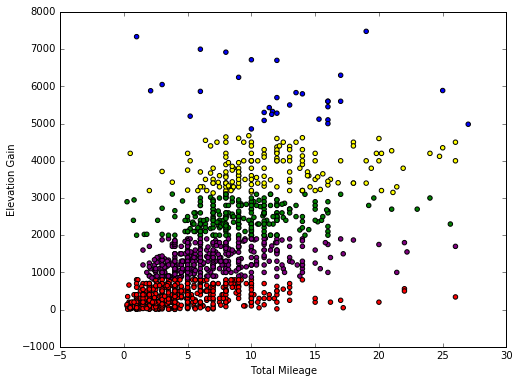

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X['total_dist'],X['elevation gain'], c=X['kmeans_label'].map(color_map))
plt.ylabel('Elevation Gain')
plt.xlabel('Total Mileage')

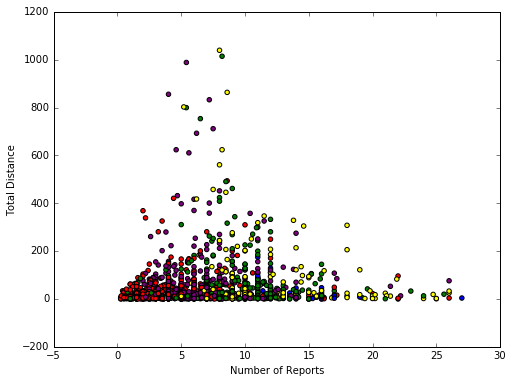

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X['total_dist'],X['numReports'], c=X['kmeans_label'].map(color_map))
plt.ylabel('Total Distance')
plt.xlabel('Number of Reports')

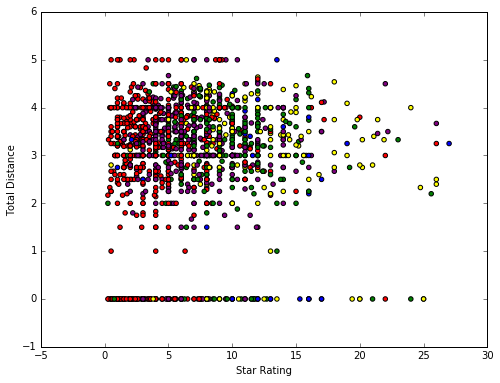

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X['total_dist'],X['stars'], c=X['kmeans_label'].map(color_map))
plt.ylabel('Total Distance')
plt.xlabel('Star Rating')

## Trying a linear regression model

In [36]:
import statsmodels.api as sms
from sklearn.cross_validation import train_test_split

In [37]:
df = df.dropna()
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
        u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]
X = sms.add_constant(X)
y = df.stars

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = sms.OLS(y_train, X_train).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.830
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           1.10e-10
Time:                        18:46:31   Log-Likelihood:                -1134.3
No. Observations:                 687   AIC:                             2309.
Df Residuals:                     667   BIC:                             2399.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.7863      0.145     19.193      0.000       2.501       3.071
elevation gain         2.451e-05   4.89e-05      0.501      0.616   -7.14e-05       0.000
number_votes              0.0102      0.006      1.712      0.087      -0.002       0.022
time_from_seattle        -0.0006      0.000     -1.570      0.117      -0.001       0.000
numReports                0.0014      0.001      1.567      0.118      -0.000       0.003
total_dist               -0.0094      0.014     -0.688      0.492      -0.036       0.017
Coast                     0.4324      0.419      1.031      0.303      -0.391       1.256
Dogs allowed on leash    -0.0833      0.105     -0.796      0.426      -0.289       0.122
Established campsites     0.1957      0.143      1.364      0.173      -0.086       0.477
Fall foliage              0.0096      0.141      0.068      0.945      -0.267       0.287
Good for kids            -0.0933      0.125     -0.743      0.457      -0.340       0.153
Lakes                     0.0623      0.122      0.510      0.610      -0.178       0.302
Mountain views            0.2819      0.117      2.407      0.016       0.052       0.512
Old growth               -0.0221      0.121     -0.183      0.855      -0.260       0.215
Ridges/passes            -0.1191      0.171     -0.696      0.486      -0.455       0.217
Rivers                    0.0339      0.150      0.226      0.821      -0.261       0.328
Summits                   0.1897      0.144      1.321      0.187      -0.092       0.472
Waterfalls                0.2626      0.169      1.557      0.120      -0.068       0.594
Wildflowers/Meadows      -0.0757      0.352     -0.215      0.830      -0.767       0.616
Wildlife                  0.0007      0.110      0.006      0.995      -0.215       0.217
==============================================================================
Omnibus:                       93.093   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.932
Skew:                          -1.030   Prob(JB):                     1.01e-28
Kurtosis:                       3.509   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LassoLars
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [41]:
lasso = ['Lasso', LassoCV()]
ridge = ['Ridge', RidgeCV()]
linreg = ['Linear Regression', LinearRegression()]
models = [lasso, ridge, linreg]

In [42]:
for mod in models:
    print mod[0]
    m = mod[1].fit(X_train, y_train)
    print 'R^2: ', m.score(X_train, y_train)
    print 'RMSE: ', np.sqrt(mean_squared_error(y_test, m.predict(X_test)))
    print '-----------------------------------------------------'

Lasso
R^2:  0.0916972415652
RMSE:  1.33106505099
-----------------------------------------------------
Ridge
R^2:  0.120341290199
RMSE:  1.31911445814
-----------------------------------------------------
Linear Regression
R^2:  0.120938432722
RMSE:  1.32189122086
-----------------------------------------------------


/Users/Jade/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Trying an ensemble model

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)

In [45]:
feat_imp = gb.feature_importances_

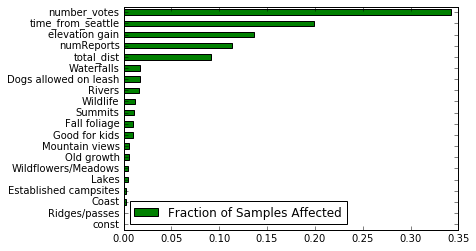

In [51]:

feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', color='green')
plt.figure(figsize=(18,6))

In [47]:
df.corr()

,Unnamed: 0.1,Unnamed: 0.1,elevation gain,number_votes,"pass(0-no pass, 1- pass required)",time_from_seattle,numReports,stars,total_dist,hike_id,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
Unnamed: 0.1,1.000000,1.000000,-0.001036,-0.273673,0.036412,0.055843,-0.276313,-0.189163,0.020895,0.999990,...,-0.056997,0.018533,0.029133,-0.089065,0.023738,-0.052741,-0.002797,-0.115253,-0.048613,0.006142
Unnamed: 0.1,1.000000,1.000000,-0.001036,-0.273673,0.036412,0.055843,-0.276313,-0.189163,0.020895,0.999990,...,-0.056997,0.018533,0.029133,-0.089065,0.023738,-0.052741,-0.002797,-0.115253,-0.048613,0.006142
elevation gain,-0.001036,-0.001036,1.000000,0.090127,0.191457,0.036247,0.175493,0.147740,0.572975,-0.001131,...,-0.510971,0.070865,0.310180,0.081142,0.191112,0.070547,0.327802,0.052292,0.169256,-0.136024
number_votes,-0.273673,-0.273673,0.090127,1.000000,0.125074,-0.131353,0.883164,0.306889,0.002450,-0.274210,...,0.040765,0.118780,0.133675,0.141670,0.044927,0.127253,0.086981,0.253466,0.121301,-0.035613
"pass(0-no pass, 1- pass required)",0.036412,0.036412,0.191457,0.125074,1.000000,0.112662,0.141193,0.187427,0.186992,0.036186,...,-0.197110,0.103268,0.149664,0.083890,0.077781,0.113033,0.048853,0.079688,0.057519,-0.032711
time_from_seattle,0.055843,0.055843,0.036247,-0.131353,0.112662,1.000000,-0.188890,-0.073671,0.130359,0.056072,...,-0.087356,-0.040721,0.118129,-0.008148,0.059556,-0.013340,0.018487,0.008973,0.002673,0.057343
numReports,-0.276313,-0.276313,0.175493,0.883164,0.141193,-0.188890,1.000000,0.324390,0.054647,-0.276848,...,-0.004827,0.148589,0.185112,0.183854,0.061410,0.122481,0.110998,0.281084,0.144823,-0.056178
stars,-0.189163,-0.189163,0.147740,0.306889,0.187427,-0.073671,0.324390,1.000000,0.078696,-0.188907,...,-0.082747,0.091674,0.146516,0.078843,0.041264,0.054745,0.100032,0.144824,0.075233,-0.039764
total_dist,0.020895,0.020895,0.572975,0.002450,0.186992,0.130359,0.054647,0.078696,1.000000,0.021058,...,-0.356723,0.124173,0.222153,0.141721,0.154323,0.147947,0.118317,0.143653,0.171904,-0.019508
hike_id,0.999990,0.999990,-0.001131,-0.274210,0.036186,0.056072,-0.276848,-0.188907,0.021058,1.000000,...,-0.056907,0.018371,0.028981,-0.089272,0.023865,-0.052721,-0.002827,-0.115572,-0.048756,0.006257


Looks like number of votes and number of reports is highly correlated.  Will remove number of votes.

In [31]:
## Features that will be used on my model
feat_scores[-10:]

,Fraction of Samples Affected
Rivers,0.009450
Waterfalls,0.009565
Dogs allowed on leash,0.012004
Wildlife,0.012269
Summits,0.012873
numReports,0.099023
total_dist,0.126846
elevation gain,0.153066
time_from_seattle,0.189918
number_votes,0.336464


## Create item dataframe

In [34]:
df = pd.read_csv('../data/washington_hikes_clean_noout.csv')

features = []
for f in df['features']:
    flist = f.strip('[').strip(']').split(',')
    features.extend(flist)
features = list(np.unique([f.lstrip() for f in features if f != '']))
for f in features:
    df[f] = [1 if f in t else 0 for t in df['features']]

In [35]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'hike_name',
       u'region', u'length', u'elevation gain', u'rating', u'number_votes',
       u'features', u'pass(0-no pass, 1- pass required)', u'which_pass',
       u'time_from_seattle', u'url', u'latlong', u'numReports', u'hike_desc',
       u'stars', u'total_dist', u'lat_long', u'hike_id', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife'],
      dtype='object')

In [39]:

item_data = df[['hike_name', 'hike_id', 'numReports', 'total_dist', 'elevation gain', 'time_from_seattle', 
                u'Coast', 'stars', u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
               u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
               u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
               u'Wildflowers/Meadows', u'Wildlife']]

item_data.to_csv('../data/itemData.csv', index_col=0)

In [41]:
item_data = pd.read_csv('../data/itemData.csv')

In [42]:
item_data.head()

,Unnamed: 0,hike_name,hike_id,numReports,total_dist,elevation gain,time_from_seattle,Coast,stars,Dogs allowed on leash,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
0,0,Grand Park via Lake Eleanor,0,212.0,8.0,1100.0,116.533333,0,4.25,0,...,0,0,1,0,0,0,0,0,0,1
1,1,Shellrock Pass,1,2.0,NaN,NaN,NaN,0,2.33,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Soda Peaks Lake,2,24.0,7.0,2500.0,227.333333,0,3.00,0,...,0,1,0,1,0,0,0,0,0,0
3,3,Shorthorn,3,5.0,5.6,1400.0,207.433333,0,3.67,1,...,0,0,1,0,0,0,0,0,0,0
4,4,West Fork Teanaway River,4,5.0,19.2,2800.0,115.750000,0,2.75,1,...,1,0,1,0,1,0,0,0,0,1
